In [34]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab
from pylab import rcParams

In [46]:
df_blocking_ilp  = pd.read_csv('../20181219_ilp/result.csv',      names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_algo = pd.read_csv('../20181219_ilp_algo/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )

In [47]:
df_blocking_algo

,load,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,2,4,3,3,0,0
1,3,13,8,8,0,0
2,4,17,14,14,0,0
3,5,27,24,24,0,0
4,6,35,32,31,0,0
5,7,45,40,41,0,0
6,8,57,56,54,0,0
7,9,55,50,50,0,0
8,10,48,45,46,0,0
9,11,75,69,67,0,0


In [48]:
df_blocking_ilp

,load,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,2,7,5,3,5,3
1,3,13,10,7,10,6
2,4,21,17,13,14,10
3,5,32,26,21,22,14
4,6,40,33,26,26,19
5,7,47,40,32,36,27
6,8,54,51,39,39,31


In [49]:
for index, row in df_blocking_ilp.iterrows():
    df_blocking_ilp.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [200, 200, 200, 200, 200]
for index, row in df_blocking_algo.iterrows():
    df_blocking_algo.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [200, 200, 200, 200, 200]

In [50]:
df_blocking_ilp =  df_blocking_ilp.replace(0, np.NaN)
df_blocking_algo =  df_blocking_algo.replace(0, np.NaN)

In [51]:
df_blocking_algo

,load,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,2,0.020,0.015,0.015,NaN,NaN
1,3,0.065,0.040,0.040,NaN,NaN
2,4,0.085,0.070,0.070,NaN,NaN
3,5,0.135,0.120,0.120,NaN,NaN
4,6,0.175,0.160,0.155,NaN,NaN
5,7,0.225,0.200,0.205,NaN,NaN
6,8,0.285,0.280,0.270,NaN,NaN
7,9,0.275,0.250,0.250,NaN,NaN
8,10,0.240,0.225,0.230,NaN,NaN
9,11,0.375,0.345,0.335,NaN,NaN


In [52]:
df_blocking_ilp

,load,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,2,0.035,0.025,0.015,0.025,0.015
1,3,0.065,0.050,0.035,0.050,0.030
2,4,0.105,0.085,0.065,0.070,0.050
3,5,0.160,0.130,0.105,0.110,0.070
4,6,0.200,0.165,0.130,0.130,0.095
5,7,0.235,0.200,0.160,0.180,0.135
6,8,0.270,0.255,0.195,0.195,0.155


In [59]:
plt.clf()
pylab.figure(figsize=(7, 7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderaxespad'] = 0
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['savefig.bbox'] = 'tight'

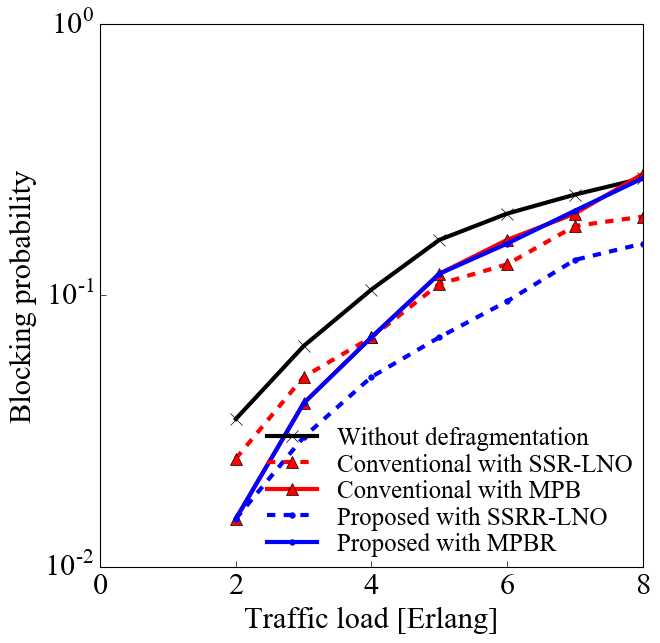

In [60]:
plt.yscale("log")
plt.minorticks_off()
plt.plot(df_blocking_ilp['load'], df_blocking_ilp['Without defragmentation'], marker='x',  color="black")

plt.plot(df_blocking_ilp['load'], df_blocking_ilp['Conventional with SSR-LNO'], label=('Conventional with SSR-LNO'), marker='^',  color="red", linestyle='--')
plt.plot(df_blocking_algo['load'], df_blocking_algo['Conventional'], label=('Conventional with MPB'), marker='^',  color="red")

plt.plot(df_blocking_ilp['load'], df_blocking_ilp['Proposed with SSRR-LNO'], label=('Proposed with SSRR-LNO'), marker='.',  color="blue", linestyle='--')
plt.plot(df_blocking_algo['load'], df_blocking_algo['Proposed'], label=('Proposed with MPBR'), marker='.',  color="blue")

# plt.yticks([1, 0.1, 0.01, 0.001, 0.0001])
plt.xticks([0, 2, 4, 6, 8])
plt.xlim(0, 8)

plt.xlabel("Traffic load [Erlang]", weight=1) # x軸のタイトル
plt.ylabel("Blocking probability") # y軸
plt.legend(loc="lower right")
plt.savefig("../../sawa_paper/sawa/20181101_journal_sawa/fig/net5_ilp.pdf")
plt.show()
plt.close()